In [1]:
import pandas as pd  #importing pandas 
import numpy as np  #importing numpy
import matplotlib.pyplot as plt  #importing matplotlib
import seaborn as sns #importing seaborn
from sklearn.preprocessing import StandardScaler #importing standardscaler
from sklearn.cluster import DBSCAN #importing dbscan
from sklearn.neighbors import NearestNeighbors #importing nearestneighbors

In [2]:
import math #importing math

In [3]:
df=pd.read_csv(r'C:\Users\Administrator\Downloads\ml360datasets\Movie_classification.csv') #reading the movie classfication 

In [4]:
df['Time_taken']=df['Time_taken'].fillna(df['Time_taken'].mean()) #filling the null values with mean value

In [5]:
X=df.drop('Start_Tech_Oscar',axis=1)  #defining the X features 

In [6]:
X=pd.get_dummies(X) #getting dummies for categorical features

In [7]:
scaler = StandardScaler() #defining the standard scaler
X_scaled = scaler.fit_transform(X) #fit and transforming the standard scaler

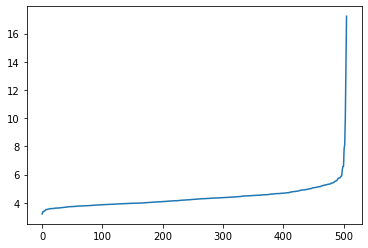

In [8]:
neighbors = NearestNeighbors(n_neighbors=2*len((X.columns))) #calculating the nearest neighbors 
neighbors_fit = neighbors.fit(X_scaled) # fitting the scaled features of X  
distances, indices = neighbors_fit.kneighbors(X_scaled) #getting the distance and index's
distances = np.sort(distances, axis=0) #sorting them 
distances = distances[:,(2*len((X.columns)))-1] #getting the index distances 
plt.plot(indices[:,0],distances) #ploting them with respective distances 
plt.show()

In [9]:
from kneed import KneeLocator # importing the kneelocator
kneedle = KneeLocator(range(1,len(distances)+1),  #x values
                      distances, # y values
                      S=1, #parameter suggested from paper
                      curve="convex", #parameter from figure
                      direction="increasing",interp_method='interp1d') #parameter from figure

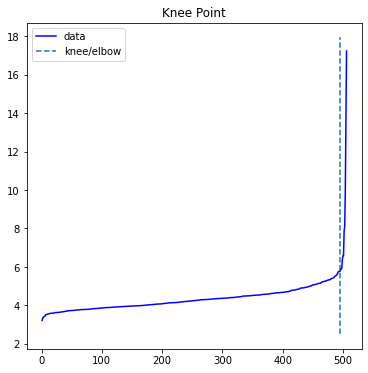

In [10]:
kneedle.plot_knee() #ploting the knee

In [11]:
kneedle.knee_y #getting the epsilon 

5.772199575735771

<Figure size 360x360 with 0 Axes>

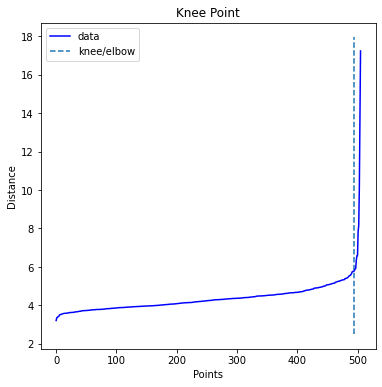

In [12]:
nearest_neighbors = NearestNeighbors(n_neighbors=2*len((X.columns))) #defining the nearestneighbors
neighbors = nearest_neighbors.fit(X_scaled) #fitting the scaled features 
distances, indices = neighbors.kneighbors(X_scaled) #getting the distances 

distances = np.sort(distances[:,2*len((X.columns))-1], axis=0) #sorting distances 
i = np.arange(len(distances)) #the range of distance length
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='interp1d')  #knee locator to find 
#the eplision
fig = plt.figure(figsize=(5, 5)) #size of plot
knee.plot_knee() # plot the knee
plt.xlabel("Points") # X label
plt.ylabel("Distance") #y label
plt.show()

In [13]:
def calc_distance(x1, y1, a, b, c): # define fun for calculating the distance
    d = abs((a * x1 + b * y1 + c)) / (math.sqrt(a * a + b * b))
    return d

In [14]:
K=range(1,len(distances)+1) #the range of len of distance
K

range(1, 507)

In [15]:
a=min(distances)-max(distances) #defining a with diffrence b/w min and max points of distance 
b=max(range(1,len(distances)+1))-min(range(1,len(distances)+1)) #defining b with differnece b/w min and max points of distance range
c1=min(range(1,len(distances)+1))*max(distances) #defining c1 with multiplication of min range value of distance and max point of distance
c2=max(range(1,len(distances)+1))*min(distances) #defining c2 with multiplication of max range value of distance and min point of distance
c=c1-c2 #defining the c with difference b/w c1 and c2

In [16]:
distance_of_points_from_line = [] # empty list of distance points 
for k in range(len(distances)):
    distance_of_points_from_line.append(calc_distance(K[k], distances[k], a, b, c)) # calculating the distance b/w 
    #the points of two lines

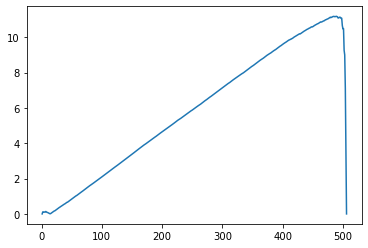

In [17]:
plt.plot(K,distance_of_points_from_line) #ploting those lines and range of those lines
plt.show()

In [18]:
e=distance_of_points_from_line.index(max(distance_of_points_from_line))+1 #getting the index of max distance points

In [19]:
e # index point

489

In [20]:
distances[e] #getting the max distance index value (eplison)

5.605084128334887

In [21]:
dbscan=DBSCAN(eps=distances[e],min_samples=2*len((X.columns))-1)  #defining the Dbscan and the parameters for eplision and min_samples
dbscan.fit(X_scaled) #fitting the X scaled matrix 
df['DBSCAN_labels']=dbscan.labels_ # getting the labels from dbscan
df['DBSCAN_labels'].value_counts() # checking the count of categories 

 0    503
-1      3
Name: DBSCAN_labels, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------

In [22]:
df=pd.read_csv(r'C:\Users\Administrator\Downloads\ml360datasets\kc_house.csv') #reading the house dataset

In [23]:
df.drop('sqft_lot15',axis=1,inplace=True) #dropping the target variable 

In [24]:
scaler = StandardScaler() # defining the Standardscaler
df_scaled = scaler.fit_transform(df) #fit and transforming the data

In [25]:
neighbors = NearestNeighbors(n_neighbors=2*len((df.columns))) #defining the NN 
neighbors_fit = neighbors.fit(df_scaled) #fitting the data 
distances, indices = neighbors_fit.kneighbors(df_scaled) #calculating the distances and indxes

In [26]:
distances = np.sort(distances, axis=0) #sorting the distances
distances = distances[:,2*(len((df.columns)))-1] # defining the values in the index of 2*(len((df.columns)))-1

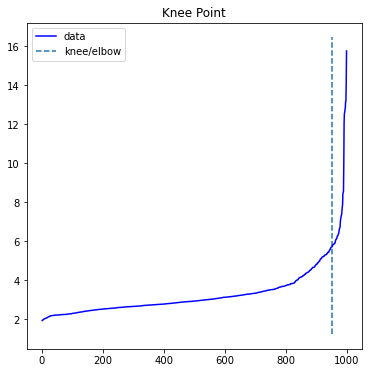

In [27]:
from kneed import KneeLocator
kneedle = KneeLocator(range(1,len(distances)+1),  #x values
                      distances, # y values
                      S=1.0, #parameter suggested from paper
                      curve="convex", #parameter from figure
                      direction="increasing") #parameter from figure
kneedle.plot_knee() #ploting the knee

In [28]:
kneedle.knee_y #eplision value

5.698867725182669

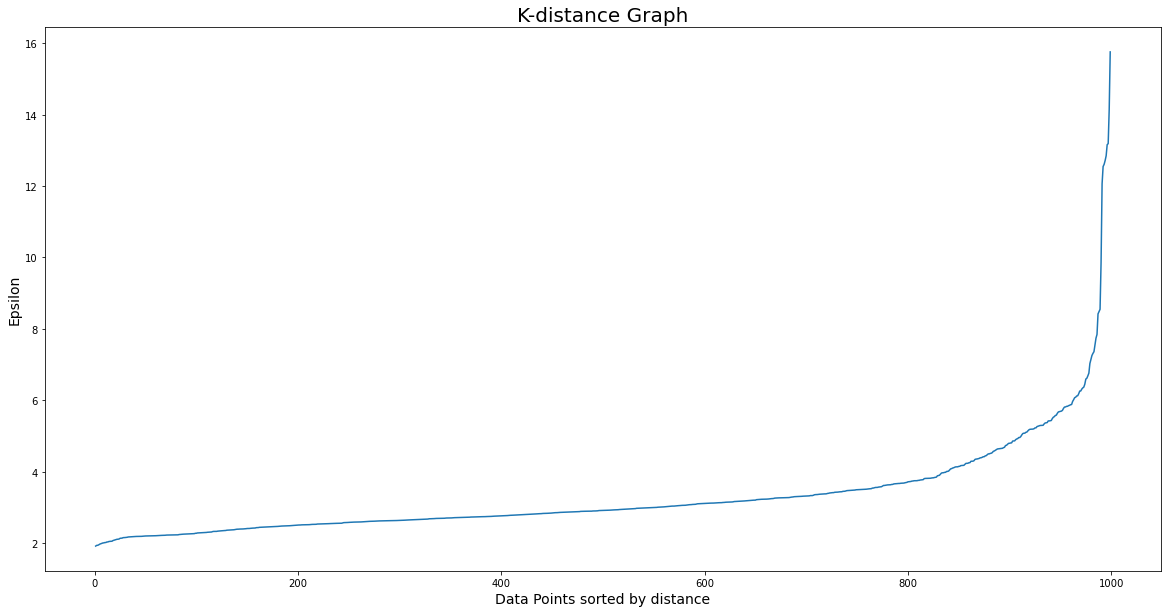

In [29]:
# Plotting K-distance Graph
nearest_neighbors = NearestNeighbors(n_neighbors=2*len((df.columns))) # defining the NN 
neighbors = nearest_neighbors.fit(df_scaled) #fitting the data
distances, indices = neighbors.kneighbors(df_scaled) #defining the distance and index
distances = np.sort(distances, axis=0) #sorting the distances
distances = distances[:,(2*len((df.columns)))-1] # storing the distance value in the index of 2*len((df.columns)))-1
plt.figure(figsize=(20,10)) #size of the plot 
plt.plot(range(1,len(distances)+1),distances) #ploting the distance values 
plt.title('K-distance Graph',fontsize=20) #title of the plot
plt.xlabel('Data Points sorted by distance',fontsize=14) # X label 
plt.ylabel('Epsilon',fontsize=14) #y label
plt.show()

In [30]:
K=range(1,len(distances)+1) # defining the range of distance len

In [31]:
a=min(distances)-max(distances) #defining a with diffrence b/w min and max points of distance 
b=max(range(1,len(distances)+1))-min(range(1,len(distances)+1)) #defining b with differnece b/w min and max points of distance range
c1=min(range(1,len(distances)+1))*max(distances) #defining c1 with multiplication of min range value of distance and max point of distance
c2=max(range(1,len(distances)+1))*min(distances) #defining c2 with multiplication of max range value of distance and min point of distance
c=c1-c2 #defining the c with difference b/w c1 and c2

In [32]:
distance_of_points_from_line = [] # empty list of distance points 
for k in range(len(distances)):
    distance_of_points_from_line.append(calc_distance(K[k], distances[k], a, b, c)) # calculating the distance b/w 
    #the points of two lines

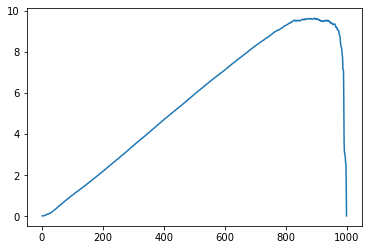

In [33]:
plt.plot(K,distance_of_points_from_line) #ploting those lines and range of those lines
plt.show()

In [34]:
e=distance_of_points_from_line.index(max(distance_of_points_from_line))+1 #getting the index of max distance points

In [35]:
e #index value of eplision

893

In [36]:
distances[e] #getting the max distance index value (eplison)

4.676511544598166

In [37]:
dbscan=DBSCAN(eps=distances[e],min_samples=2*len((df.columns))-1) #defining the dbscan with imp parameters
dbscan.fit(df_scaled) #fitting the scaled data
df['DBSCAN_labels']=dbscan.labels_ # getting the labels from dbscan
df['DBSCAN_labels'].value_counts()  #counting the categories 

 0    936
-1     63
Name: DBSCAN_labels, dtype: int64

--------------------------------------------------------------------------------------------------------------------------------

In [40]:
df=pd.read_csv(r'C:\Users\Administrator\Downloads\ml360datasets\loan_classification.csv')

In [41]:
df['Gender']=df['Gender'].replace('#',np.nan) # replacing the special charater 
df['Gender']=df['Gender'].replace('?',np.nan) # replacing the special charater 
df['Gender']=df['Gender'].replace(np.nan,df['Gender'].mode()[0]) # Replacing the Null values
df['Married']=df['Married'].replace(np.nan,df['Married'].mode()[0]) # Replacing the Null values
df['Dependents']=df['Dependents'].replace(np.nan,df['Dependents'].mode()[0]) # Replacing the Null values
df['Self_Employed']=df['Self_Employed'].replace(np.nan,df['Self_Employed'].mode()[0]) # Replacing the Null values
df['Credit_History']=df['Credit_History'].replace(np.nan,df['Credit_History'].mode()[0]) # Replacing the Null values
df['LoanAmount']=df['LoanAmount'].replace(np.nan,df['LoanAmount'].mean()) # Replacing the Null values
df['Loan_Amount_Term']=df['Loan_Amount_Term'].replace(np.nan,df['Loan_Amount_Term'].mean()) # Replacing the Null values
df['Credit_History']=df['Credit_History'].astype('object') #chnaging the datatype


In [42]:
df.drop(columns=['Loan_Status','Loan_ID'],axis=1,inplace=True) #droping the loan id column

In [43]:
df=pd.get_dummies(df) # getting dummies for categorical features in X matrix

In [44]:
scaler = StandardScaler() # defining the standard scaler
df_scaled = scaler.fit_transform(df) #fitting transform X matrix 

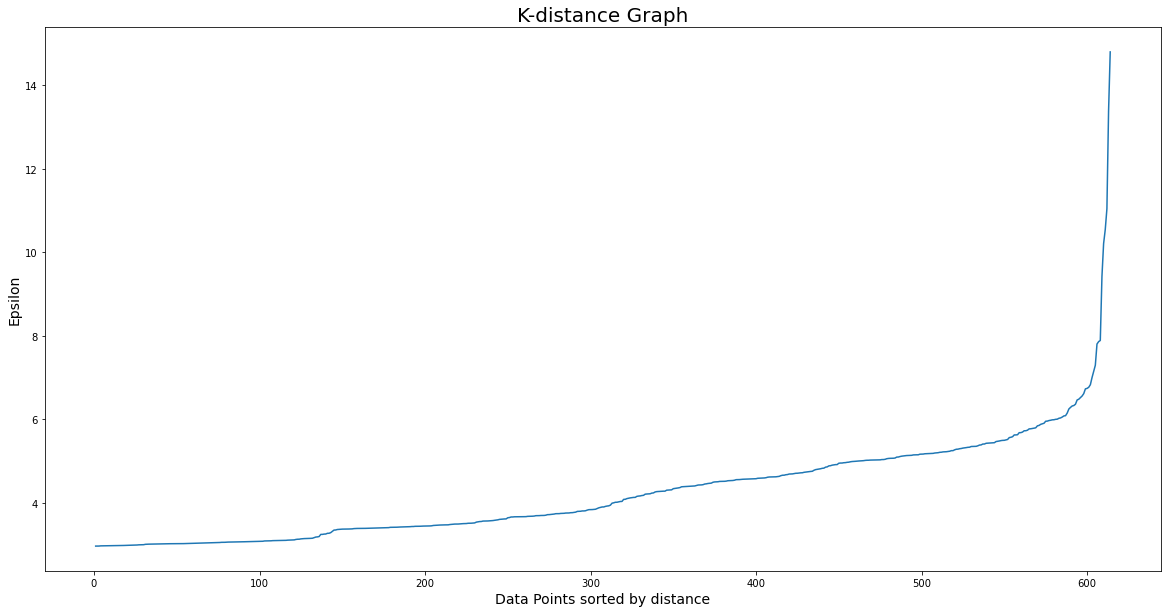

In [46]:
# Plotting K-distance Graph
nearest_neighbors = NearestNeighbors(n_neighbors=2*len((df.columns))) #defining the NN with n_neighbors with 2*len((df.columns)
neighbors = nearest_neighbors.fit(df_scaled) # fitting the scaled to NN
distances, indices = neighbors.kneighbors(df_scaled) #calculating the distance 
distances = np.sort(distances, axis=0) 
distances = distances[:,(2*len((df.columns)))-1] #sorting the distance in the index of  2*len((df.columns))-1
plt.figure(figsize=(20,10)) #size of plot 
plt.plot(range(1,len(distances)+1),distances) #ploting the distances 
plt.title('K-distance Graph',fontsize=20) #title 
plt.xlabel('Data Points sorted by distance',fontsize=14) #X label
plt.ylabel('Epsilon',fontsize=14) # Y label
plt.show()

In [47]:
K=range(1,len(distances_new)+1) # defining the range of distance len

In [48]:
a=min(distances)-max(distances) #defining a with diffrence b/w min and max points of distance 
b=max(range(1,len(distances)+1))-min(range(1,len(distances)+1)) #defining b with differnece b/w min and max points of distance range
c1=min(range(1,len(distances)+1))*max(distances) #defining c1 with multiplication of min range value of distance and max point of distance
c2=max(range(1,len(distances)+1))*min(distances) #defining c2 with multiplication of max range value of distance and min point of distance
c=c1-c2 #defining the c with difference b/w c1 and c2

In [49]:
distance_of_points_from_line = [] # empty list of distance points 
for k in range(len(distances)):
    distance_of_points_from_line.append(calc_distance(K[k], distances[k], a, b, c)) # calculating the distance b/w 
    #the points of two lines

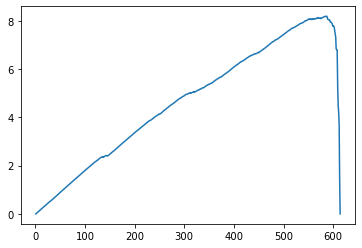

In [50]:
plt.plot(K,distance_of_points_from_line) #ploting those lines and range of those lines
plt.show()

In [51]:
e=distance_of_points_from_line.index(max(distance_of_points_from_line))+1 #getting the index of max distance points

In [52]:
e #index value of eplision

587

In [53]:
distances[e] #getting the max distance index value (eplison)

6.148633825944554

In [54]:
dbscan=DBSCAN(eps=distances[e],min_samples=2*len((df.columns))-1) #defining the dbscan with imp parameters
dbscan.fit(df_scaled) #fitting the scaled data
df['DBSCAN_labels']=dbscan.labels_ # getting the labels from dbscan
df['DBSCAN_labels'].value_counts()  #counting the categories 

 0    608
-1      6
Name: DBSCAN_labels, dtype: int64

--------------------------------------------------------------------------------------------------------------------------------

In [55]:
df=pd.read_csv('C:/Users/Administrator/Downloads/ml360datasets/winequality-white.csv') #reading the house dataset

In [57]:
df.drop('quality',axis=1,inplace=True) #dropping the target variable 

In [58]:
scaler = StandardScaler() # defining the Standardscaler
df_scaled = scaler.fit_transform(df) #fit and transforming the data

In [59]:
neighbors = NearestNeighbors(n_neighbors=2*len((df.columns))) #defining the NN 
neighbors_fit = neighbors.fit(df_scaled) #fitting the data 
distances, indices = neighbors_fit.kneighbors(df_scaled) #calculating the distances and indxes

In [60]:
distances = np.sort(distances, axis=0) #sorting the distances
distances = distances[:,2*(len((df.columns)))-1] # defining the values in the index of 2*(len((df.columns)))-1

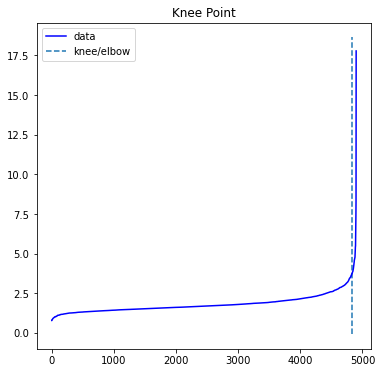

In [61]:
from kneed import KneeLocator
kneedle = KneeLocator(range(1,len(distances)+1),  #x values
                      distances, # y values
                      S=1.0, #parameter suggested from paper
                      curve="convex", #parameter from figure
                      direction="increasing") #parameter from figure
kneedle.plot_knee() #ploting the knee

In [62]:
kneedle.knee_y #eplision value

3.779624472909617

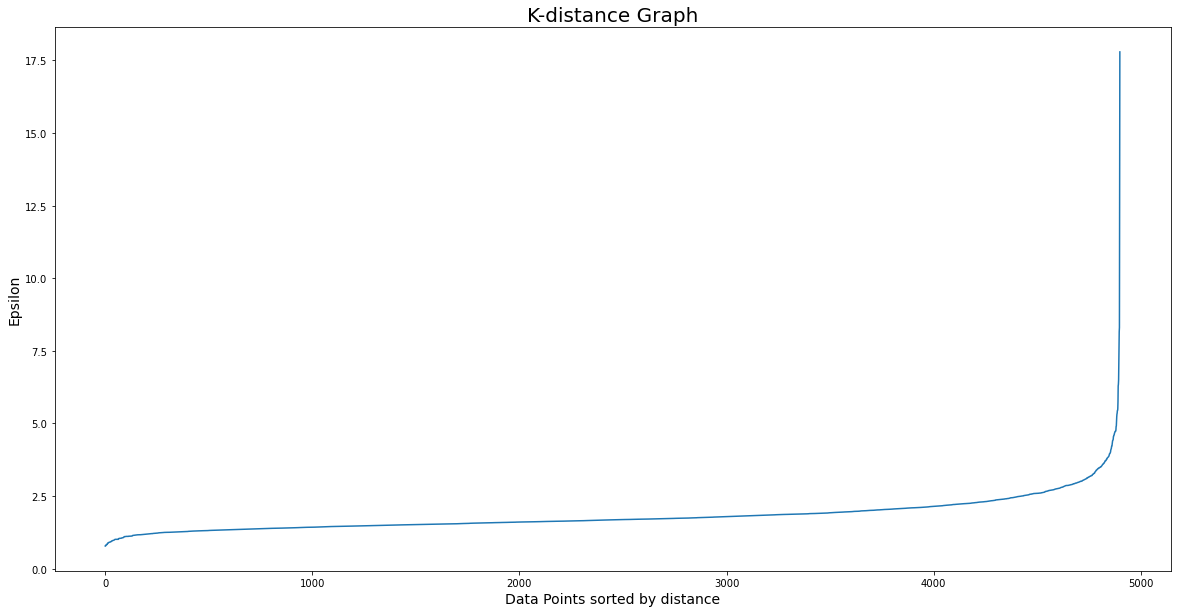

In [63]:
# Plotting K-distance Graph
nearest_neighbors = NearestNeighbors(n_neighbors=2*len((df.columns))) # defining the NN 
neighbors = nearest_neighbors.fit(df_scaled) #fitting the data
distances, indices = neighbors.kneighbors(df_scaled) #defining the distance and index
distances = np.sort(distances, axis=0) #sorting the distances
distances = distances[:,(2*len((df.columns)))-1] # storing the distance value in the index of 2*len((df.columns)))-1
plt.figure(figsize=(20,10)) #size of the plot 
plt.plot(range(1,len(distances)+1),distances) #ploting the distance values 
plt.title('K-distance Graph',fontsize=20) #title of the plot
plt.xlabel('Data Points sorted by distance',fontsize=14) # X label 
plt.ylabel('Epsilon',fontsize=14) #y label
plt.show()

In [64]:
K=range(1,len(distances)+1) # defining the range of distance len

In [65]:
a=min(distances)-max(distances) #defining a with diffrence b/w min and max points of distance 
b=max(range(1,len(distances)+1))-min(range(1,len(distances)+1)) #defining b with differnece b/w min and max points of distance range
c1=min(range(1,len(distances)+1))*max(distances) #defining c1 with multiplication of min range value of distance and max point of distance
c2=max(range(1,len(distances)+1))*min(distances) #defining c2 with multiplication of max range value of distance and min point of distance
c=c1-c2 #defining the c with difference b/w c1 and c2

In [66]:
distance_of_points_from_line = [] # empty list of distance points 
for k in range(len(distances)):
    distance_of_points_from_line.append(calc_distance(K[k], distances[k], a, b, c)) # calculating the distance b/w 
    #the points of two lines

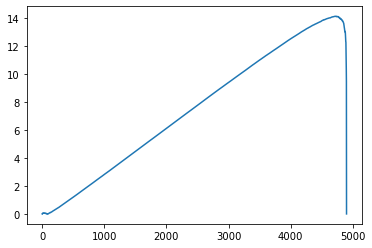

In [67]:
plt.plot(K,distance_of_points_from_line) #ploting those lines and range of those lines
plt.show()

In [68]:
e=distance_of_points_from_line.index(max(distance_of_points_from_line))+1 #getting the index of max distance points

In [69]:
e #index value of eplision

4716

In [70]:
distances[e] #getting the max distance index value (eplison)

3.031457524528436

In [71]:
dbscan=DBSCAN(eps=distances[e],min_samples=2*len((df.columns))-1) #defining the dbscan with imp parameters
dbscan.fit(df_scaled) #fitting the scaled data
df['DBSCAN_labels']=dbscan.labels_ # getting the labels from dbscan
df['DBSCAN_labels'].value_counts()  #counting the categories 

 0    4850
-1      48
Name: DBSCAN_labels, dtype: int64